In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-11T02:27:43.906871+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

/home/runner/work/multilevel-selection-concept/multilevel-selection-concept/binder/pylib/_SyncHostCompartmentsSimple.py:158: UserWarning: exposed_variant and infectious_variant are both NaN
  warnings.warn(


  Running 2020-02-09 (20/650) (1.39 s)  ———————————————————— 3%
  Running 2020-02-19 (30/650) (2.20 s)  ———————————————————— 5%
  Running 2020-02-29 (40/650) (3.02 s)  •——————————————————— 6%
  Running 2020-03-10 (50/650) (3.82 s)  •——————————————————— 8%
  Running 2020-03-20 (60/650) (4.67 s)  •——————————————————— 9%
  Running 2020-03-30 (70/650) (5.56 s)  ••—————————————————— 11%
  Running 2020-04-09 (80/650) (6.44 s)  ••—————————————————— 12%
  Running 2020-04-19 (90/650) (7.31 s)  ••—————————————————— 14%
  Running 2020-04-29 (100/650) (8.16 s)  •••————————————————— 16%
  Running 2020-05-09 (110/650) (9.01 s)  •••————————————————— 17%
  Running 2020-05-19 (120/650) (9.86 s)  •••————————————————— 19%
  Running 2020-05-29 (130/650) (10.70 s)  ••••———————————————— 20%
  Running 2020-06-08 (140/650) (11.69 s)  ••••———————————————— 22%
  Running 2020-06-18 (150/650) (12.78 s)  ••••———————————————— 23%
  Running 2020-06-28 (160/650) (13.83 s)  ••••———————————————— 25%
  Running 2020-07-0

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
enter log_context_duration for _do_sequences


  1%|          | 1/193 [00:06<19:55,  6.23s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 5.9132080078125}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.11332964897155762}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.018922090530395508}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.772445678710938e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.1021575927734375e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0007059574127197266}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}


 10%|▉         | 19/193 [00:06<00:35,  4.89it/s]

enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00016021728515625}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.00023245811462402344}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003123283386230469}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0003685951232910156}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.00016355514526367188}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00025391578674316406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!

 18%|█▊        | 35/193 [00:06<00:13, 12.09it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.5272369384765625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 8.177757263183594e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.937980651855469e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00037980079650878906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0013287067413330078}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0004889965057373047}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!

 23%|██▎       | 44/193 [00:06<00:08, 17.90it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.724761962890625e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.054473876953125e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00026488304138183594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00012826919555664062}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 7.367134094238281e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!

 31%|███       | 60/193 [00:07<00:04, 29.01it/s]

exit log_context_duration for extract
!!! {"extract": 0.0073757171630859375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006804466247558594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.987022399902344e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.1975250244140625e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003249645233154297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.987022399902344e-

 39%|███▉      | 76/193 [00:07<00:02, 43.24it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0007174015045166016}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0002994537353515625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032520294189453125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00010275840759277344}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 8.273124694824219e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes


 49%|████▊     | 94/193 [00:07<00:01, 60.02it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.8133392333984375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.700920104980469e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.651878356933594e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00033593177795410156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 9.655952453613281e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.008148193359375e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!

 58%|█████▊    | 112/193 [00:07<00:01, 69.01it/s]

enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.011950969696044922}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.006176948547363281}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008716583251953125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00022101402282714844}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.00011372566223144531}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003590583801269531}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!

 67%|██████▋   | 130/193 [00:07<00:00, 70.15it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004813671112060547}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.987022399902344e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.3882598876953125e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003380775451660156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 9.632110595703125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.745887756347656e-05}
ent

 72%|███████▏  | 138/193 [00:08<00:00, 67.53it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005156993865966797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.811981201171875e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0028312206268310547}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0010712146759033203}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00048422813415527344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 9.846687316894531e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.3882598876953125e-05}
e

 79%|███████▉  | 153/193 [00:08<00:00, 61.51it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 9.393692016601562e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.00024390220642089844}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002892017364501953}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.724761962890625e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.982948303222656e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!

 83%|████████▎ | 160/193 [00:08<00:00, 57.51it/s]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.032299041748046875}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.011955976486206055}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001741170883178711}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.653236389160156e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.030632019042969e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00029349327087402344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter

 86%|████████▌ | 166/193 [00:08<00:00, 30.11it/s]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.17180895805358887}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.06585979461669922}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.007890462875366211}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.82012939453125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.1975250244140625e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00040984153747558594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
enter l

 91%|█████████ | 175/193 [00:09<00:00, 30.36it/s]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.06711387634277344}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.024935483932495117}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0031671524047851562}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.653236389160156e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.054473876953125e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002849102020263672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter 

100%|██████████| 193/193 [00:09<00:00, 20.49it/s]


exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00039887428283691406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.62939453125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.221366882324219e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002727508544921875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.534027099609375e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.030632019042969e-05}
enter

  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0023102760314941406}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03347897529602051}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.010370016098022461}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0020279884338378906}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03388500213623047}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.005719900131225586}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 19.18it/s]

exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003587484359741211}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03773021697998047}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.01496744155883789}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0038306713104248047}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.042592525482177734}
enter log_context_duration for res.collect


 71%|███████▏  | 5/7 [00:00<00:00, 15.47it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.023435115814208984}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003385782241821289}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.045075416564941406}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.02748250961303711}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0029761791229248047}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.05307292938232422}
enter log_context_duration for res.collect
exit log_context_duration for res.c

100%|██████████| 7/7 [00:00<00:00, 14.88it/s]


exit log_context_duration for mismatches
!!! {"mismatches": 0.034076690673828125}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.022606372833251953}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.6247208118438721}
sequence_diff
{"0": "'",    33850
{"0": "'"}     5900
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 0, 1, 2, 3, 4
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.3150348663330078}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'",    33850
{"0": "'"}     5900
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequ

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.2056102752685547}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 5913/5913 [00:26<00:00, 219.59it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 28.816736459732056}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 5913/5913 [00:06<00:00, 957.70it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 179.28205037117004}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.07379269599914551}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 239.2803225517273}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.026227712631225586}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.004076480865478516}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.007321357727050781}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0011553764343261719}
ancestral_seq


100%|██████████| 1171/1171 [00:00<00:00, 346614.68it/s]

process mutations:   0%|          | 1/1171 [00:00<03:52,  5.03it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   1%|          | 8/1171 [00:24<1:02:18,  3.21s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   38.2s



process mutations:   4%|▍         | 48/1171 [02:23<56:08,  3.00s/it] 

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.6min



process mutations:   8%|▊         | 88/1171 [04:12<51:18,  2.84s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  4.6min



process mutations:  11%|█         | 128/1171 [06:10<50:18,  2.89s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  6.6min



process mutations:  14%|█▍        | 168/1171 [08:04<48:04,  2.88s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  8.7min



process mutations:  18%|█▊        | 208/1171 [10:05<47:03,  2.93s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed: 10.7min



process mutations:  21%|██        | 248/1171 [12:14<46:33,  3.03s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed: 12.8min



process mutations:  25%|██▍       | 288/1171 [14:16<44:42,  3.04s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed: 14.9min



process mutations:  28%|██▊       | 328/1171 [16:18<42:43,  3.04s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed: 17.0min



process mutations:  31%|███▏      | 368/1171 [18:17<40:21,  3.02s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 19.1min



process mutations:  35%|███▍      | 408/1171 [20:03<36:57,  2.91s/it]

[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 20.9min



process mutations:  38%|███▊      | 448/1171 [22:11<36:05,  3.00s/it]

[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed: 22.8min



process mutations:  42%|████▏     | 488/1171 [24:05<33:33,  2.95s/it]

[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 24.9min



process mutations:  45%|████▌     | 528/1171 [25:52<30:42,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed: 27.1min



process mutations:  49%|████▊     | 568/1171 [27:35<27:56,  2.78s/it]

[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed: 29.0min



process mutations:  52%|█████▏    | 608/1171 [29:24<25:58,  2.77s/it]

[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed: 30.8min



process mutations:  55%|█████▌    | 648/1171 [31:19<24:21,  2.79s/it]

[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed: 32.8min



process mutations:  59%|█████▉    | 688/1171 [33:17<22:53,  2.84s/it]

[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 34.9min



process mutations:  62%|██████▏   | 728/1171 [35:16<21:16,  2.88s/it]

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed: 36.9min



process mutations:  66%|██████▌   | 768/1171 [37:02<18:53,  2.81s/it]

[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 758 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 38.8min



process mutations:  69%|██████▉   | 808/1171 [38:59<17:12,  2.84s/it]

[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 40.9min



process mutations:  72%|███████▏  | 848/1171 [41:06<15:50,  2.94s/it]

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed: 42.6min



process mutations:  76%|███████▌  | 888/1171 [43:09<14:05,  2.99s/it]

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed: 44.7min



process mutations:  79%|███████▉  | 928/1171 [45:00<11:49,  2.92s/it]

[Parallel(n_jobs=-1)]: Done 898 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed: 46.7min



process mutations:  83%|████████▎ | 968/1171 [47:01<09:58,  2.95s/it]

[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 47.0min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed: 48.8min



process mutations:  86%|████████▌ | 1008/1171 [48:56<07:57,  2.93s/it]

[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed: 50.3min
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed: 50.8min



process mutations:  89%|████████▉ | 1048/1171 [50:52<05:59,  2.92s/it]

[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed: 50.9min
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed: 52.6min



process mutations:  93%|█████████▎| 1088/1171 [52:42<03:57,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed: 52.7min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 53.9min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 54.4min



process mutations:  96%|█████████▋| 1128/1171 [54:38<02:03,  2.88s/it]

[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed: 54.6min
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed: 55.9min
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 56.3min



process mutations: 100%|██████████| 1171/1171 [56:27<00:00,  2.89s/it]

[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 56.5min


[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed: 56.7min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed: 56.8min
[Parallel(n_jobs=-1)]: Done 1141 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done 1171 out of 1171 | elapsed: 57.9min finished


process replicate: 100%|██████████| 1/1 [1:02:00<00:00, 3720.50s/it]


enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2856898307800293}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 118
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.5791735649108887, 0.5791735649108887, 0.5791735649108887, 0.5791735649108887, 0.5791735649108887
$ mut_nobs                       <u32> 76404, 76404, 76404, 76404, 76404
$ mut_uuid                       <str> '320fa13d-921f-8e6a-ba49-b2e95a3eeded', '320fa13d-921f-8e6a-ba49-b2e95a3eeded', '320fa13d-921f-8e6a-ba49-b2e95a
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 10987, 11370, 10968, 11368, 9422
$ phyo_df_screened_len           <u16> 839, 456, 858, 458, 2404
$ tb_stat                      

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


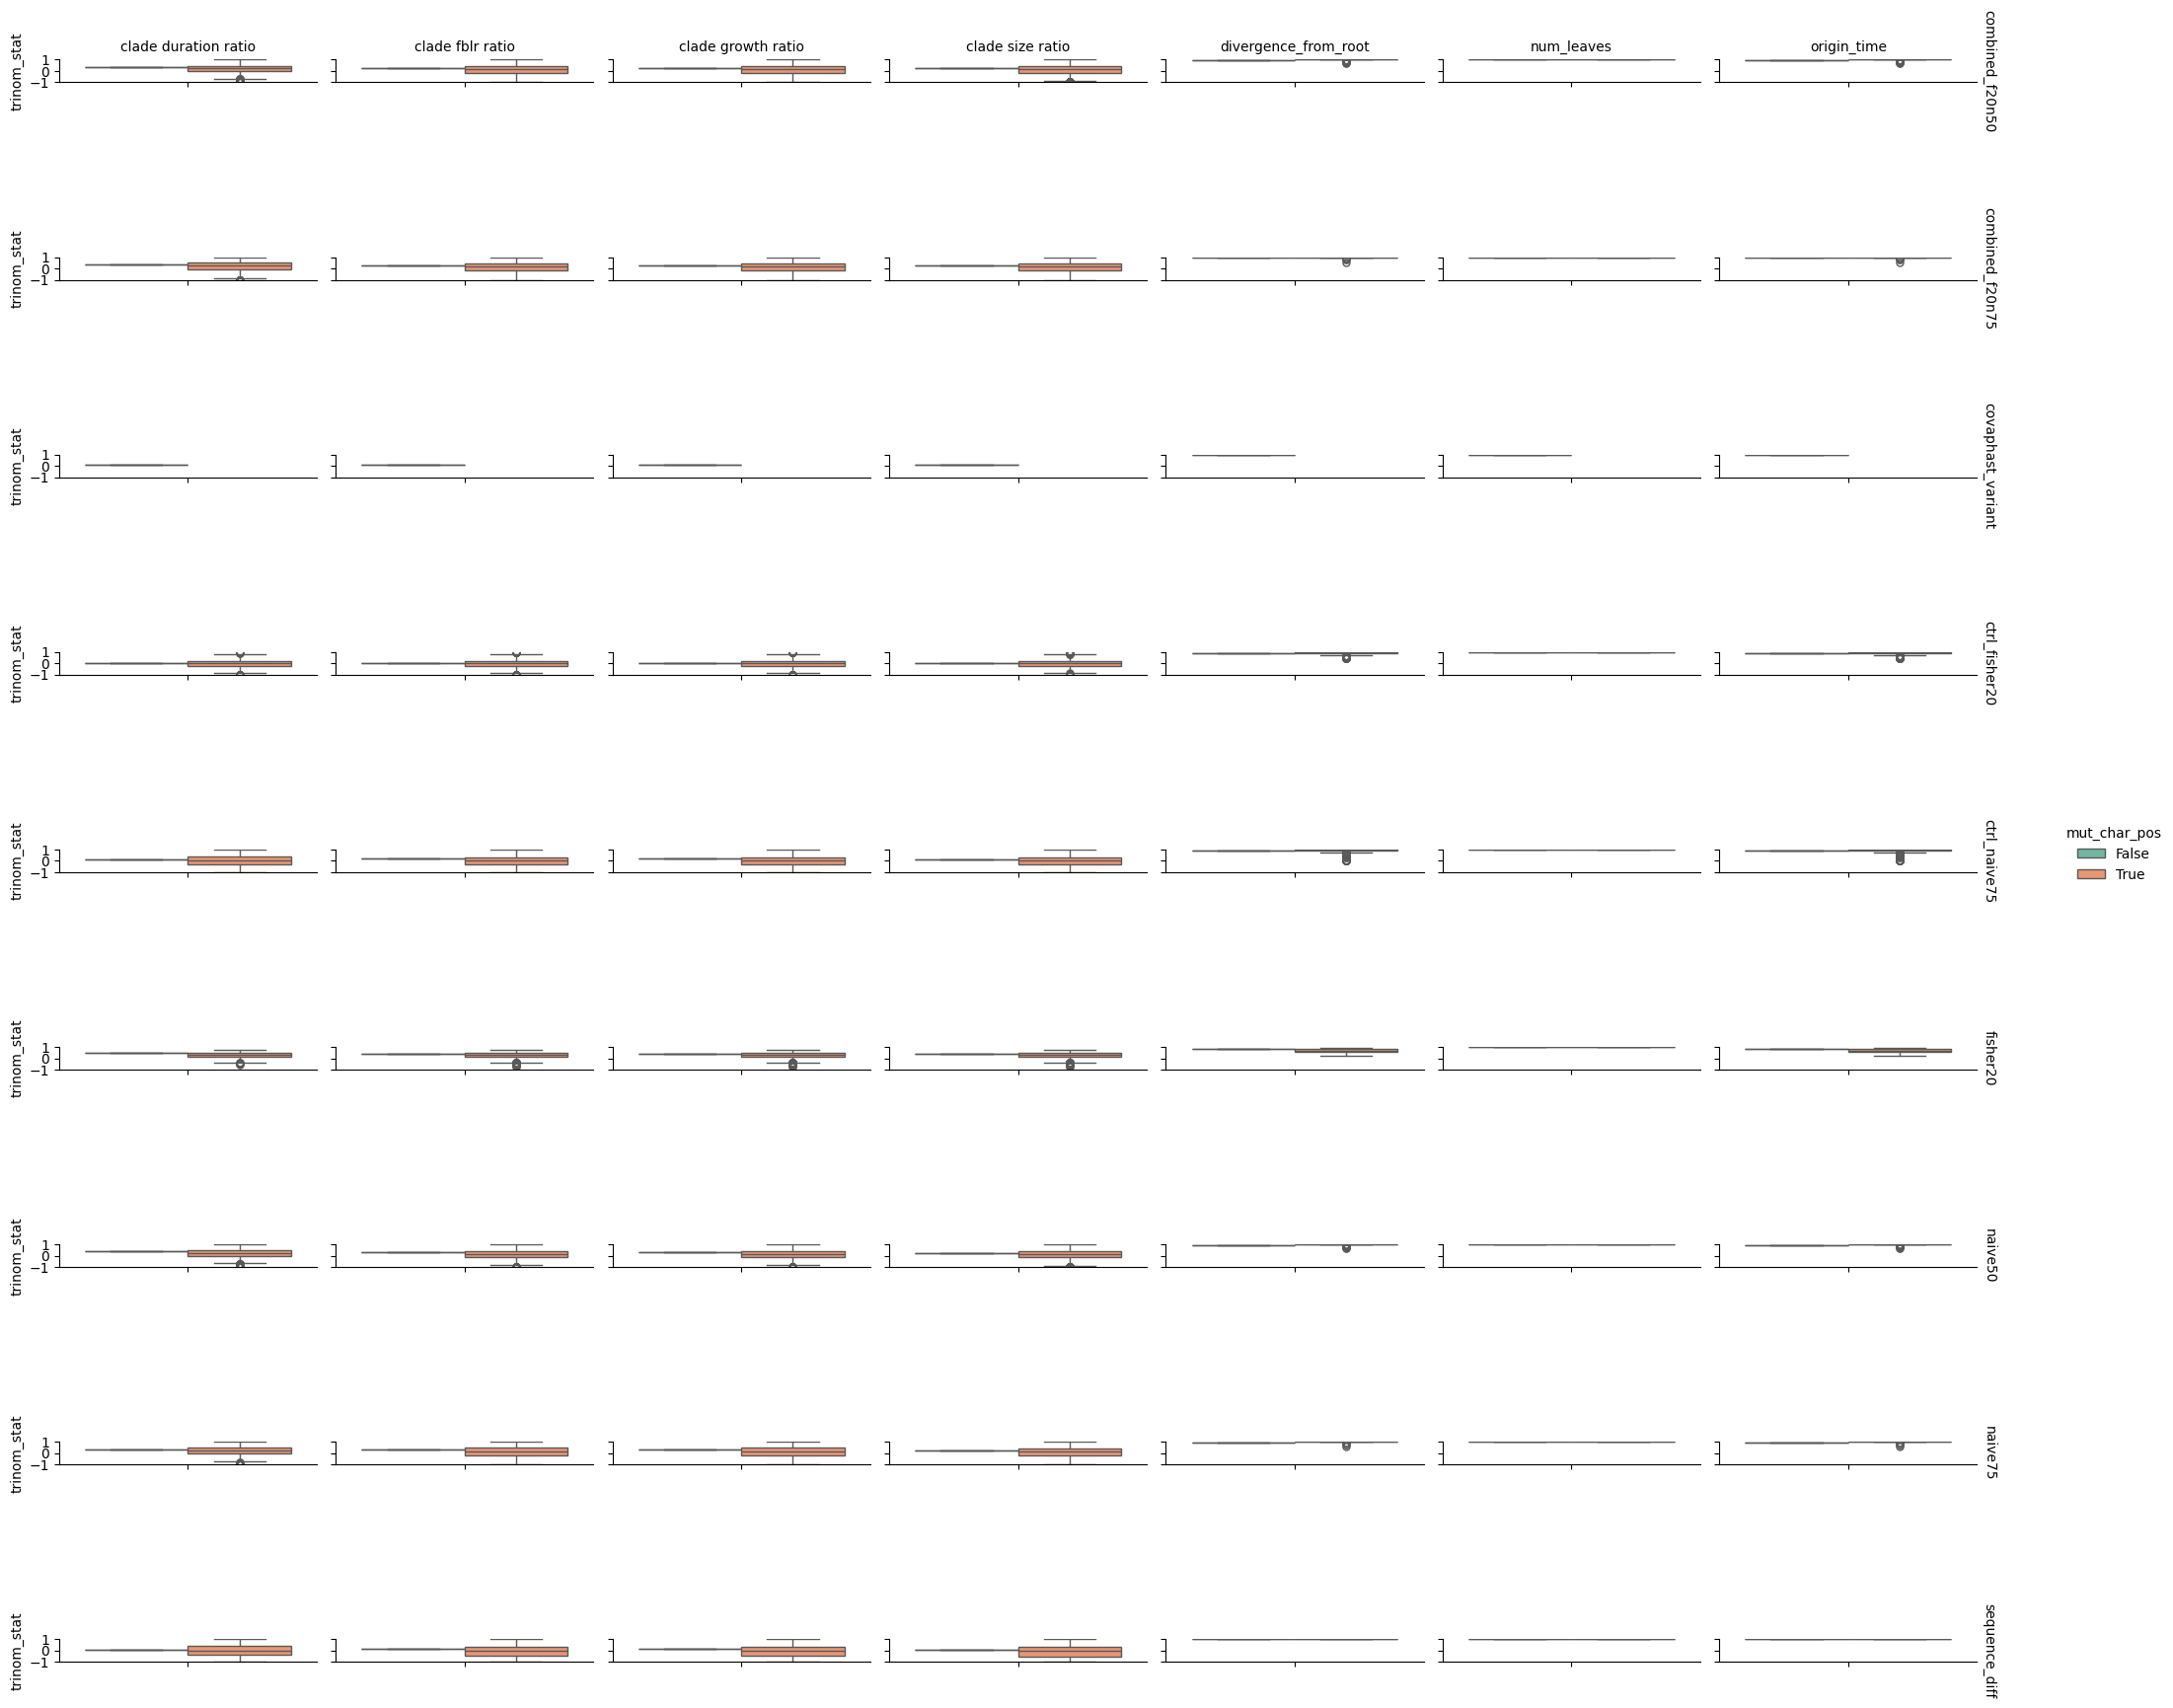

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


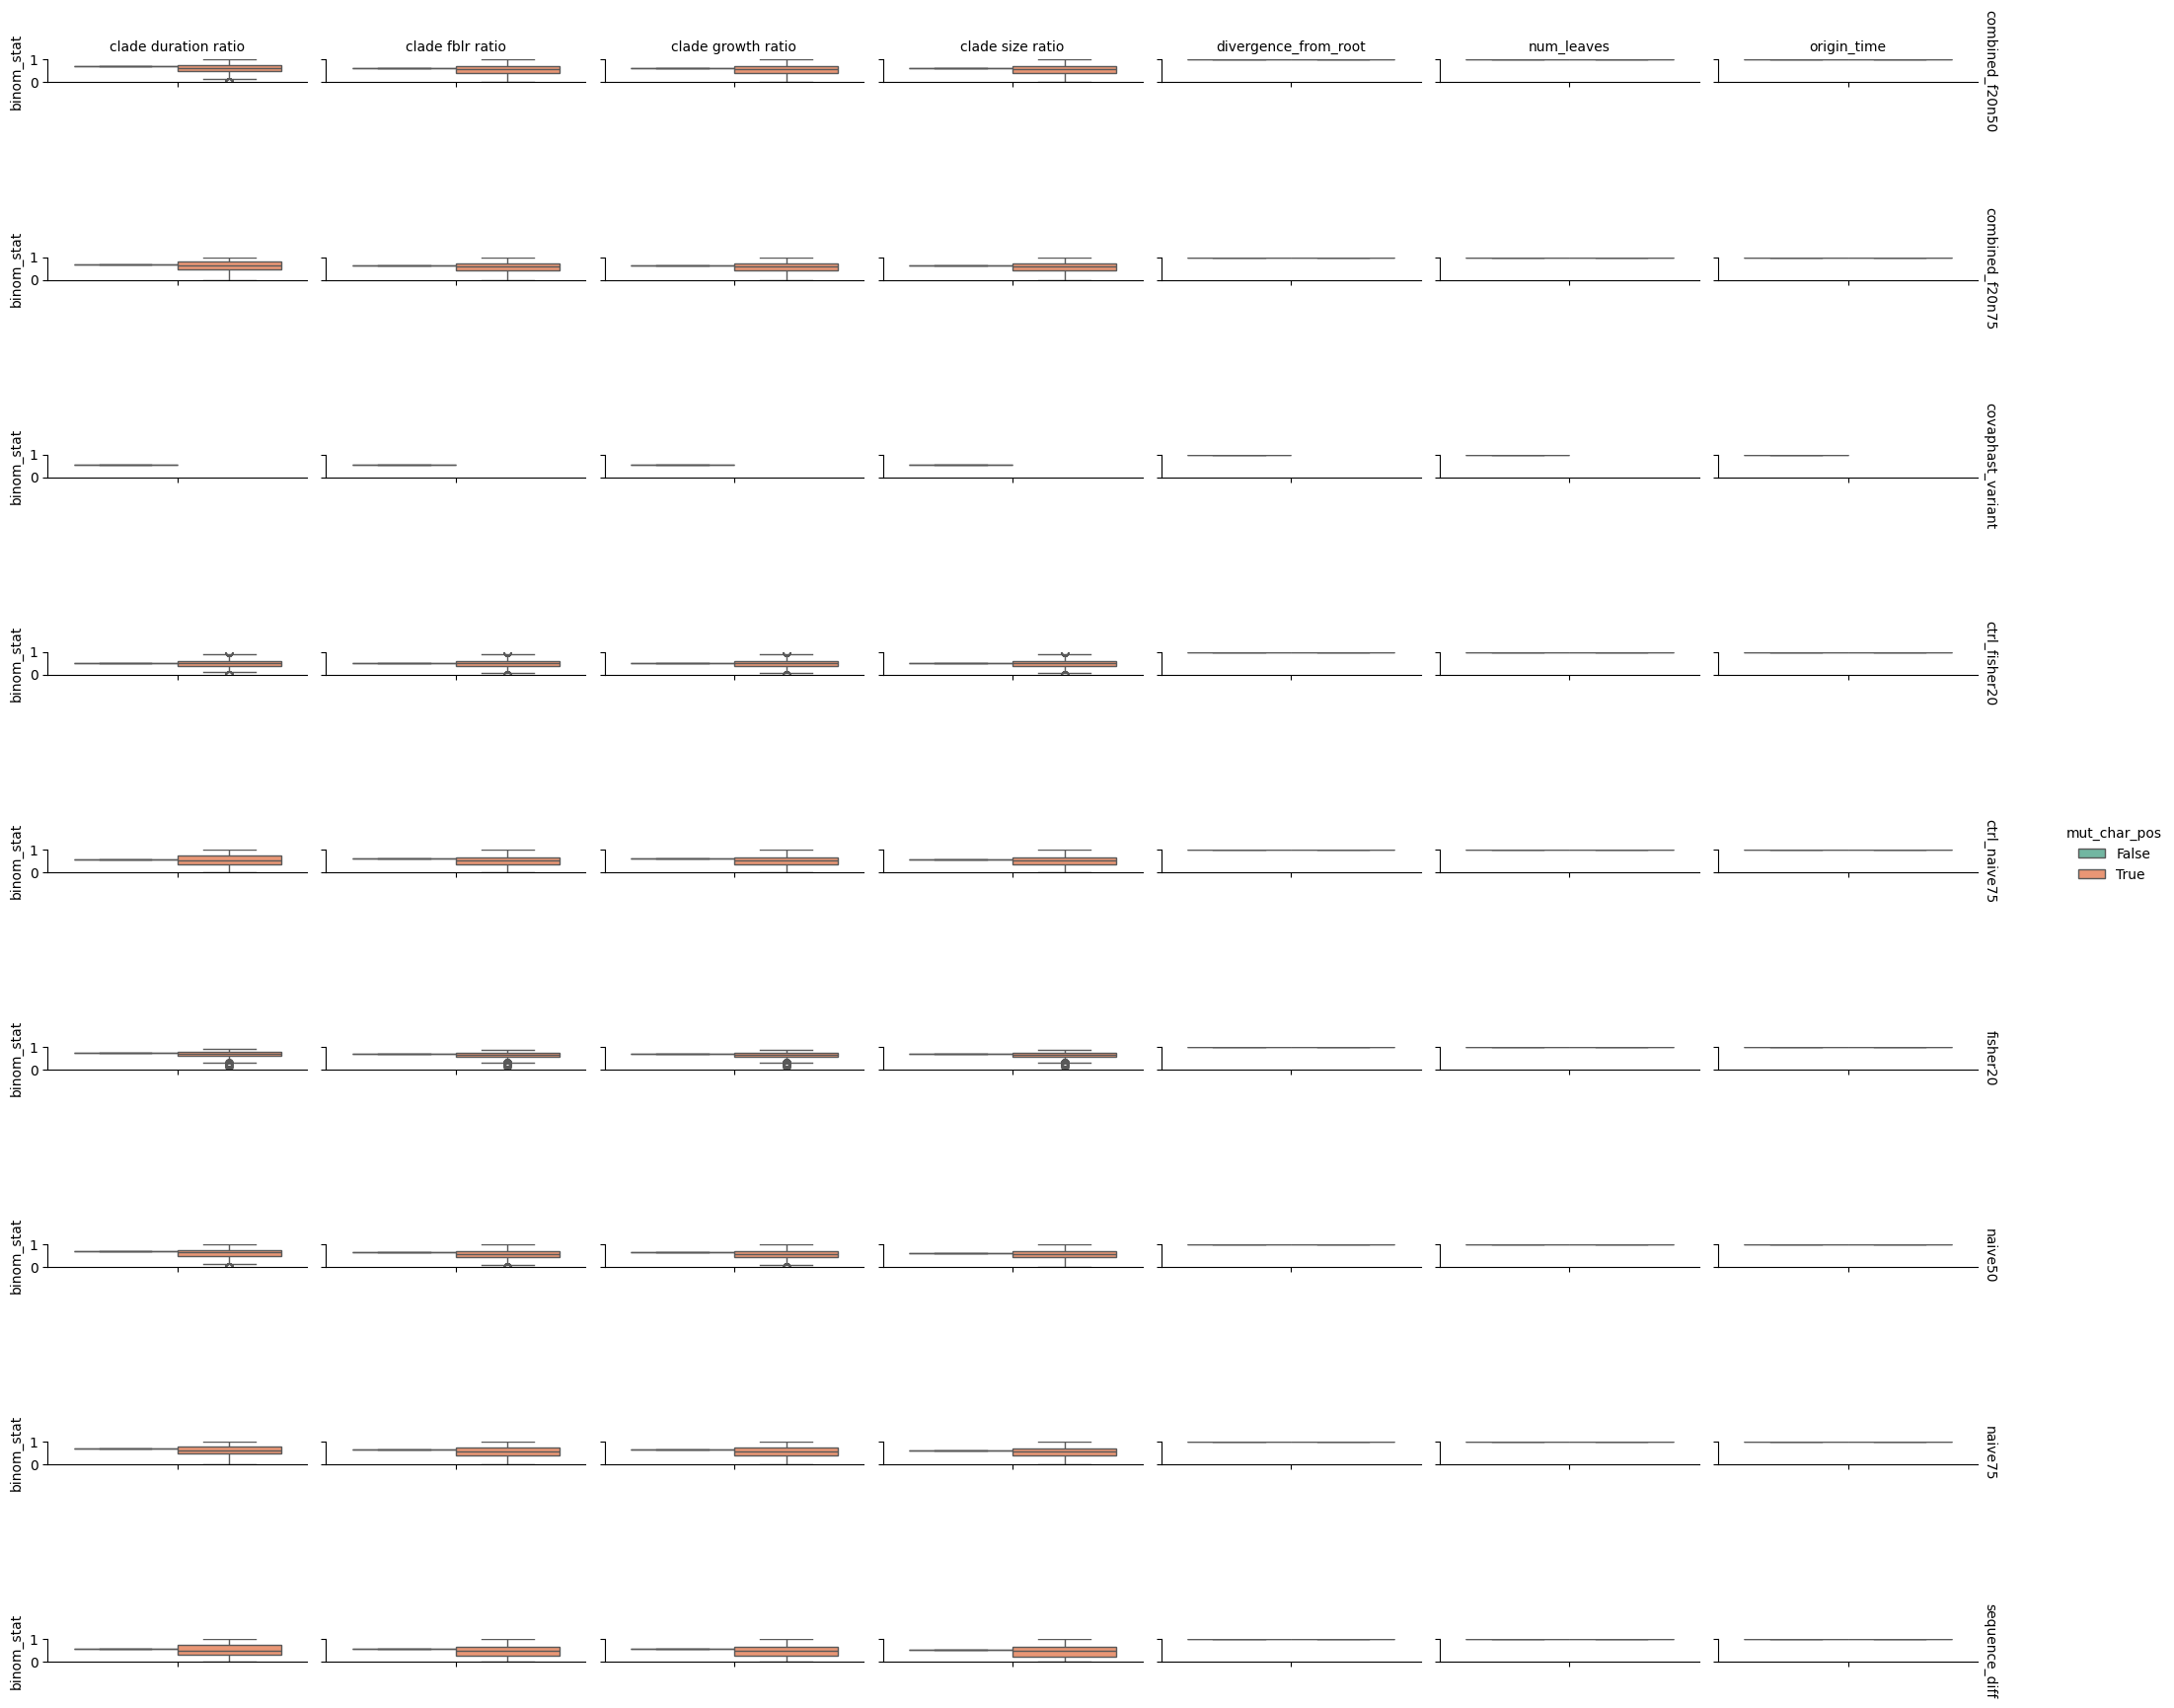

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


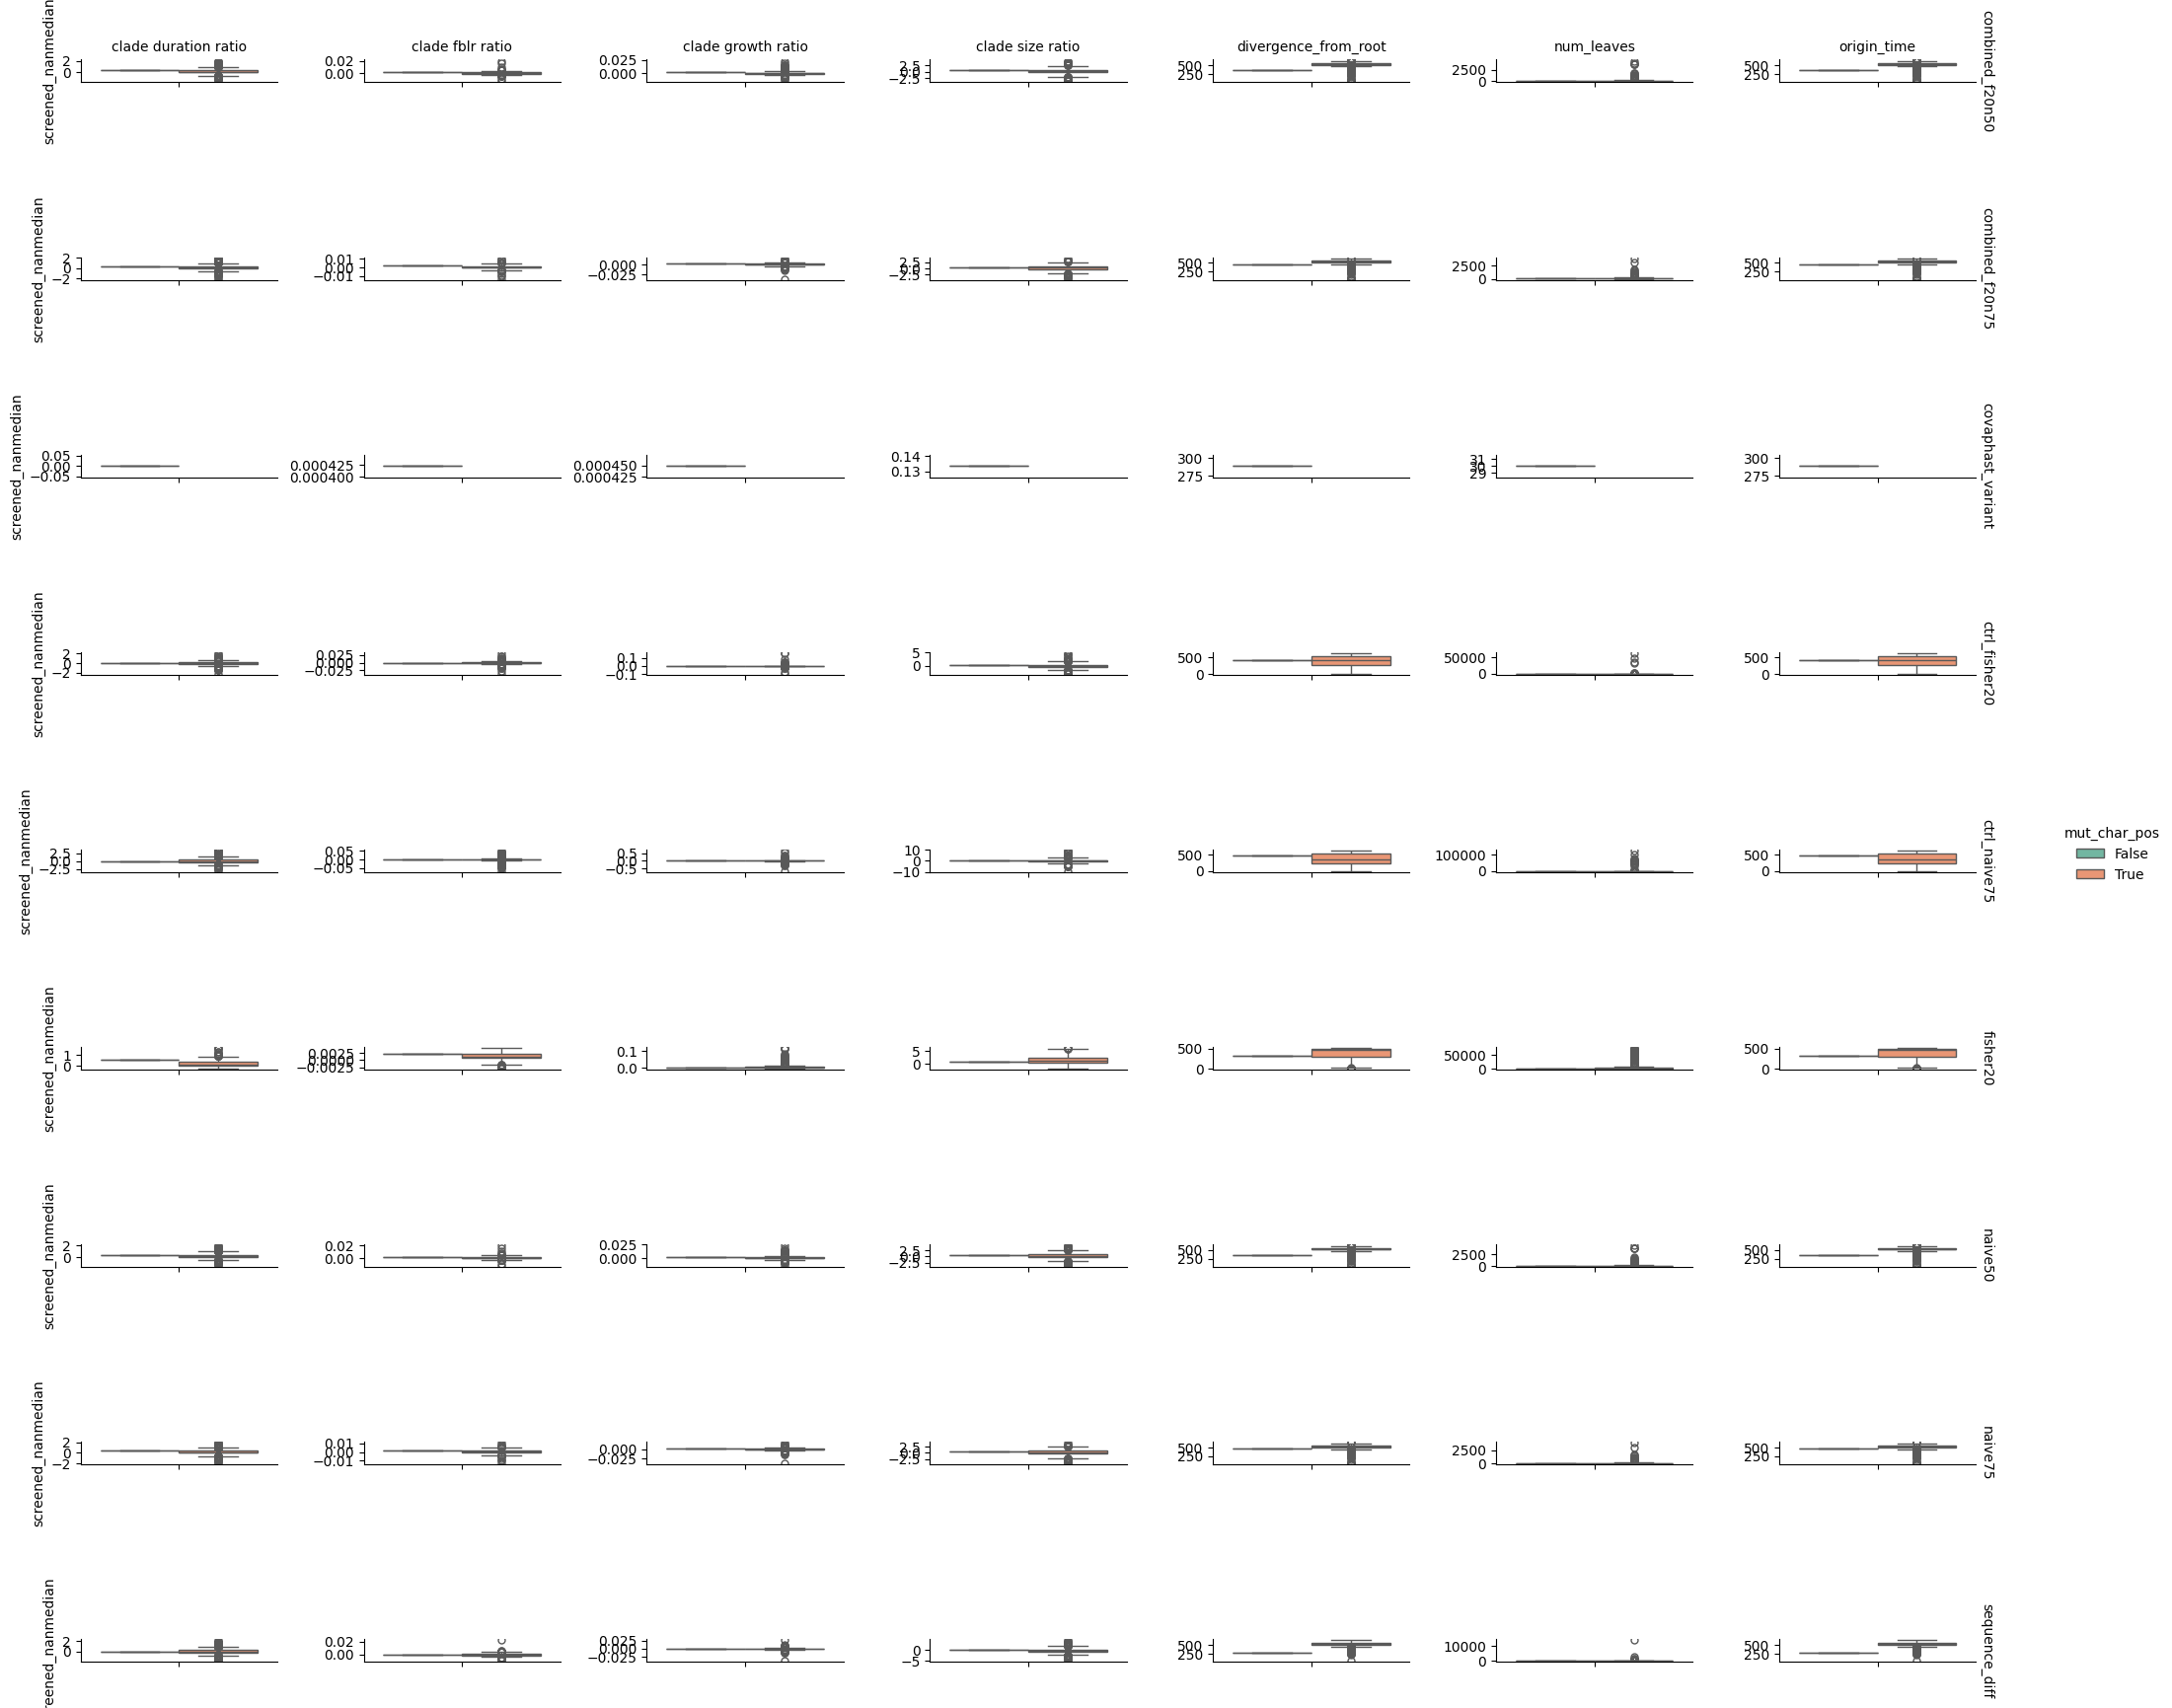

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


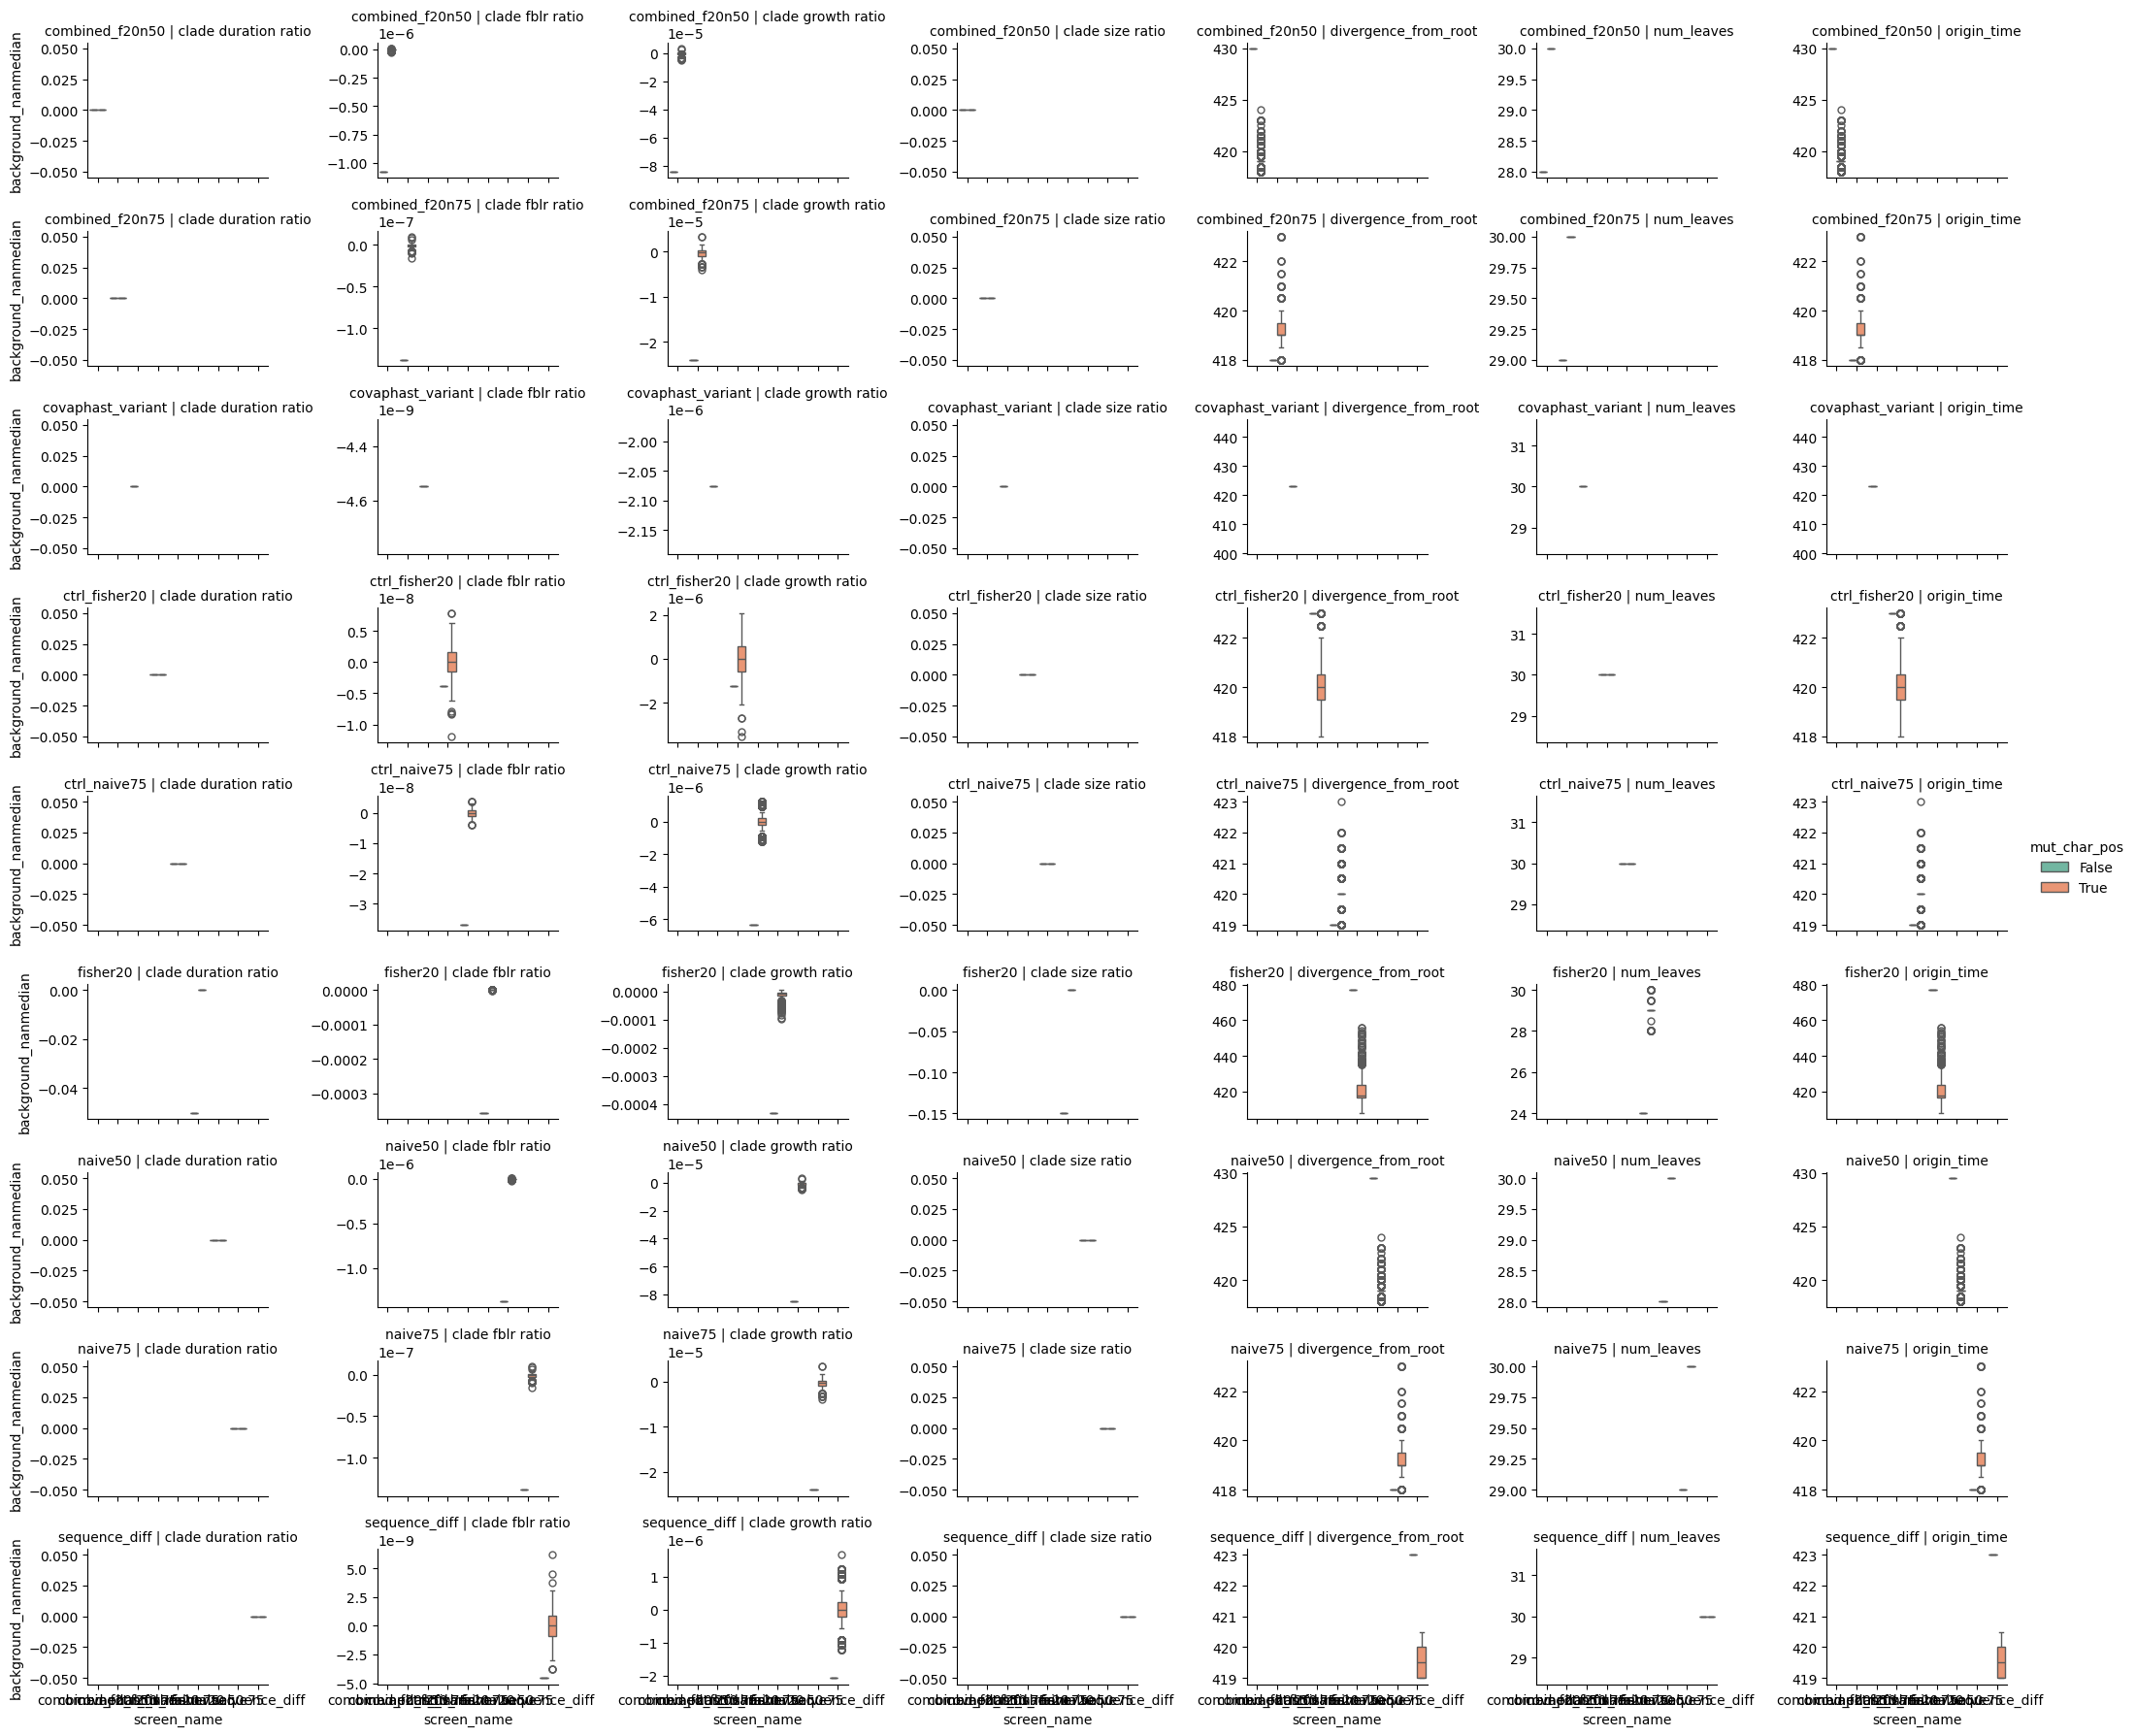

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
